In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from dropbot_dx import SerialProxy

%matplotlib inline

# Connect to the connected DropBot DX and print it's properties
proxy = SerialProxy()
proxy.properties

base_node_software_version                                                     
package_name                                                         dropbot-dx
display_name                                                         DropBot DX
manufacturer                                                        Wheeler Lab
url                           http://github.com/wheeler-microfluidics/dropbo...
software_version                                                      1.5.post1
dtype: object

rms_error = 5.3%


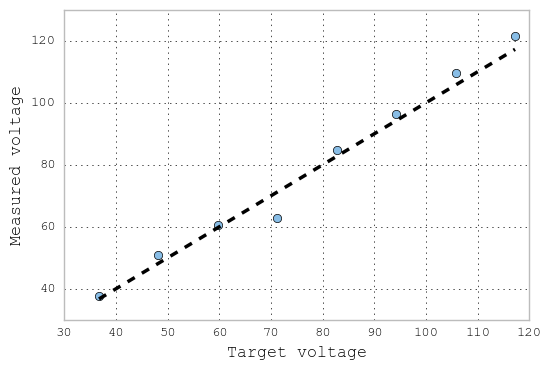

In [21]:
# test the measured voltage for a range of target voltages
proxy.voltage = proxy.min_waveform_voltage
proxy.hv_output_enabled = True
measured_voltage = []

voltage = np.linspace(proxy.min_waveform_voltage,
                      proxy.max_waveform_voltage,
                      10)[1:-1]
for v in voltage:
    proxy.voltage = v
    time.sleep(.5)
    measured_voltage.append(proxy.measured_voltage)

measured_voltage = np.array(measured_voltage)
proxy.voltage = proxy.min_waveform_voltage + 5

# plot the measured vs target votage
plt.plot(voltage, measured_voltage, 'o')
plt.plot(voltage, voltage, 'k--')
plt.xlabel('Target voltage')
plt.ylabel('Measured voltage')

# calculate the average rms error
r = measured_voltage - voltage
print 'rms_error = %.1f%%' % (100 * np.sqrt(np.mean((r / voltage)**2)))

[ 0.02389144  0.00594931]
pot_max = 47782.8794267
R7 = 11898.6249992
min_voltage = 25.883414689
max_voltage = 126.814986509


1

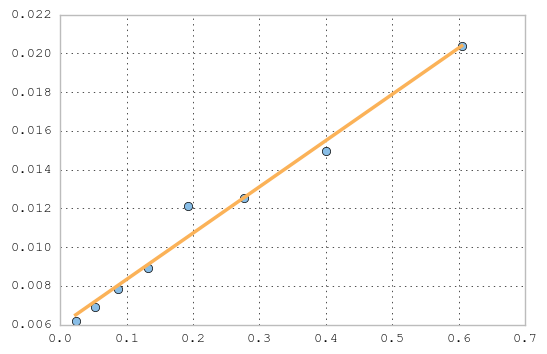

In [22]:
# update the calibration values
R6 = 2e6
R7 = proxy.config.R7
pot_max = proxy.config.pot_max

R_pot = R6 / ( 2 * voltage / 1.5 - 1 ) - R7
x = R_pot / pot_max

plt.plot(x, 1 / (2 * np.array(measured_voltage) / 1.5 - 1), 'o')
p = np.polyfit(x, 1 / (2 * np.array(measured_voltage) / 1.5 - 1), 1)
print p
plt.plot(x, x*p[0] + p[1])
pot_max = p[0]*R6
R7 = p[1]*R6

print 'pot_max =', pot_max
print 'R7 =', R7
max_voltage = 1.5 / 2.0 * (R6 / R7 + 1)
min_voltage = 1.5 / 2.0 * (R6 / (pot_max + R7) + 1)
print 'min_voltage =', min_voltage 
print 'max_voltage =', max_voltage
proxy.update_config(pot_max=pot_max,
                    R7=R7,
                    #min_voltage=min_voltage,
                    max_voltage=max_voltage)

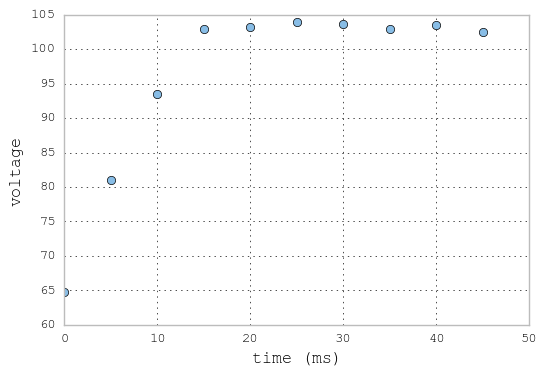

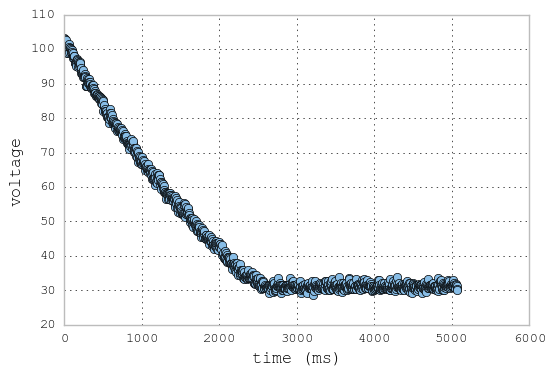

In [24]:
# test how long it takes to change the actuation voltage
proxy.voltage = 30
proxy.voltage = 100
t, v = zip(*[(time.time(), proxy.measured_voltage) for x in range(10)])
t = np.array(t) - t[0]
plt.figure()
plt.plot(1e3*t, v, 'o')
plt.ylabel('voltage')
plt.xlabel('time (ms)')

proxy.voltage = 30
t, v = zip(*[(time.time(), proxy.measured_voltage) for x in range(1000)])
t = np.array(t) - t[0]
plt.figure()
plt.plot(1e3*t, v, 'o')
plt.ylabel('voltage')
plt.xlabel('time (ms)')